<a href="https://colab.research.google.com/github/Samxiar/ML/blob/main/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
from sklearn.datasets import load_iris

In [3]:
# Creating an instance.
ir = load_iris()

In [4]:
# The Directory Info 
dir(ir)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
# Feature Info
ir.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# Putting the required dataset in a Data Frame.
df = pd.DataFrame(ir.data,columns = ir.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['target'] = ir.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
# 0 = Setosa
# 1 = Versicolor
# 2 = Virginica
ir.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
# Exploration
df[df.target == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [10]:
df[df.target == 2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [11]:
df[df.target == 0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df['flower_name'] = df.target.apply(lambda x: ir.target_names[x])
df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8  

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# Seperating the flower Data into 3 different dataframes
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

In [15]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


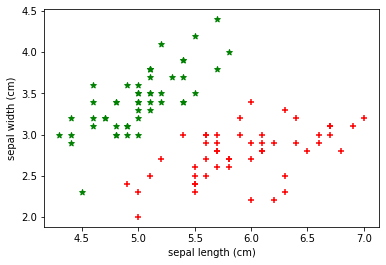

In [16]:
# Creating Visuals For the Sepal.
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color = 'green', marker='*')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color = 'red', marker='+')

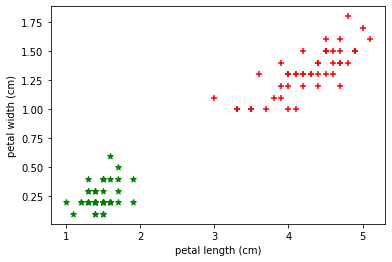

In [17]:
# Creating Visuals For the Pet al.
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color = 'green', marker='*')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = 'red', marker='+')

In [18]:
# Training the data using the Train Split Model.
from sklearn.model_selection import train_test_split

In [19]:
x = df.drop(['target','flower_name'],axis='columns')
x.head()
y = df.target

In [20]:
#splting the data to 30% training and 70% Testing.
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
len(X_train)

105

In [21]:
len(X_test)

45

In [22]:
# Importing Support Vector Classifier
from sklearn.svm import SVC
# Creating svm classifier
model = SVC()

In [23]:
# Training The Model
model.fit(X_train,y_train)
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [24]:
# Accuracy of the Model.
model.score(X_test,y_test)

0.9555555555555556

*Accuracy is 95%*

*C-Support Vector Classification.*

*The implementation is based on libsvm. The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples. For large datasets consider using LinearSVC or SGDClassifier instead, possibly after a Nystroem transformer.*

*The multiclass support is handled according to a one-vs-one scheme.*

*For details on the precise mathematical formulation of the provided kernel functions and how gamma, coef0 and degree affect each other, see the corresponding section in the narrative documentation: Kernel functions.*